In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread(r'C:\Users\salgueir\Pictures/zucchini.jpg')
# Convert Image to HSV color space
im_channels = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
im_channels = cv2.GaussianBlur(im_channels, (5, 5), 0)
z = im_channels.reshape((-1, 3))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
ret, label, center = cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [32]:
im_channels.dtype

dtype('uint8')

In [3]:
label

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [4]:
z.shape

(8838000, 3)

In [5]:
label.shape

(8838000, 1)

In [6]:
label.reshape(im_channels.shape[:2])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [7]:
max(label)

array([1], dtype=int32)

In [8]:
label.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [9]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(im_channels.shape)

In [10]:
res.shape

(8838000, 3)

In [11]:
res2.shape

(2946, 3000, 3)

In [12]:
im_channels.shape

(2946, 3000, 3)

In [13]:
v2d = label.reshape(im_channels.shape[:2])

In [14]:
v2d.shape

(2946, 3000)

In [15]:
ret

22860005092.538338

In [16]:
ar = np.where(v2d == 0)

In [17]:
ar.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [18]:
print(max(ar[0]), min(ar[0]))

2945 0


In [19]:
print(max(ar[1]), min(ar[1]))

2999 0


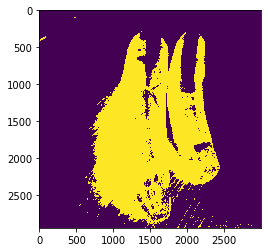

In [20]:
fig = plt.figure()
plt.imshow(v2d)
plt.show()

In [21]:
def erosion(img, kernel_size, iterations):
	kernel = np.ones((kernel_size, kernel_size), np.uint8)
	erosion = cv2.erode(img, kernel, iterations=iterations)
	return erosion

In [51]:
v2d2 = np.uint8(v2d)
print(v2d2.shape)
print(v2d2.dtype)

(2946, 3000)
uint8


In [52]:
print(im_channels[:,:,2].shape)
print(im_channels[:,:,2].dtype)

(2946, 3000)
uint8


In [78]:
v2d2_eroded = erosion(v2d2, 25, 1)

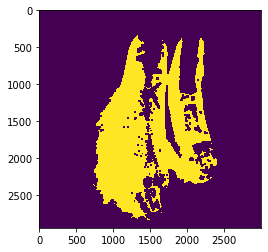

In [79]:
fig = plt.figure()
plt.imshow(v2d2_eroded)
plt.show()

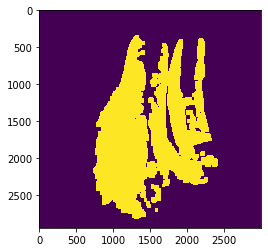

In [81]:
kernel_size = 50
kernel = np.ones((kernel_size, kernel_size), np.uint8)
v2d2_oc = cv2.morphologyEx(v2d2, cv2.MORPH_CLOSE, kernel)
v2d2_oc = cv2.morphologyEx(v2d2, cv2.MORPH_OPEN, kernel)
fig = plt.figure()
plt.imshow(v2d2_oc)
plt.show()

In [83]:
v2d2_oc[2000, 1000]

1

In [23]:
label.shape

(8838000, 1)

In [24]:
label.index(1)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [29]:
indices = np.nonzero(v2d == 1)

In [30]:
len(indices[0])

2686756